# Субградиентный спуск
Одним из распространенных расширений градиентного спуска для случая негладких выпуклых функций является <i>субградиентный спуск</i>.

<b>Определение</b>. Вектор $g\in \mathbb{R}^n$ функции $f:\mathcal{D}\subset\mathbb{R}^n\rightarrow \mathbb{R}$ называется <i>субградиентом</i> в точке $x$ если $\forall y\in \mathbb{D}$ выполняется
$$
f(y)\geq f(x)+g^T(y-x).
$$
Выпуклые функции не обязаны быть дифференцируемы, поэтому градиентный спуск нельзя корректно применить для произвольной выпуклой функции, тем не менее любая выпуклая функция в любой точке имеет хотя бы один субградиент, который можно использовать в качестве направления в градиентном спуске сохраняя сходимость.

<b>Определение</b>. <i>Субдифференциалом</i> $f$ в точке $x$ называется множество всех субградиентов $f$ в точке $x$ и обозначается $\partial f(x)$.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["text.usetex"] = True

In [2]:
import numpy as np

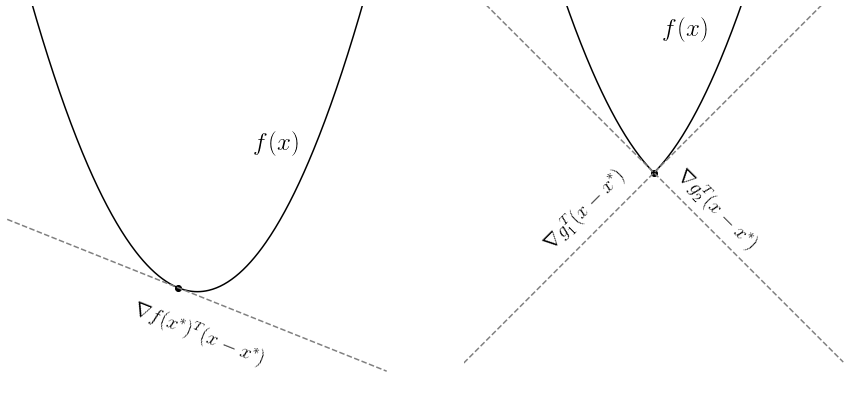

In [3]:
def smooth_function(x):
    return x ** 2

def nonsmooth_function(x):
    return (x + 0.5) ** 2 if x > 0 else (x - 0.5) ** 2

def smooth_d(x):
    return 2 * x

def nonsmooth_left_d(x):
    return 2 * (x - 0.5)

def nonsmooth_right_d(x):
    return 2 * (x + 0.5)

def show_subgradient():
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    
    axs[0].set_xlim((-2, 2))
    axs[0].set_ylim((-1, 3))

    axs[1].set_xlim((-2, 2))
    axs[1].set_ylim((-2, 2))

    
    for ax in axs:     
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        for name, spine in ax.spines.items():
            spine.set_visible(False)
            spine.set_visible(False)
       
    q = np.arange(-2, 2, 0.01)
    r = np.arange(-1, 1, 0.01)
    x_star = -0.2
    
    axs[0].plot(q, [smooth_function(x) for x in q], color='black')
    axs[0].plot(q, [smooth_function(x_star) + smooth_d(x_star) * (y - x_star) for y in q], color='grey', linestyle='--')
    axs[0].scatter([x_star], [smooth_function(x_star)], color='black')
    axs[0].text(1-0.4, smooth_function(1)+0.5, r"$f(x)$", fontsize=25)
    #print(smooth_d(x_star), 180 * np.arctan(smooth_d(x_star)) / np.pi)
    axs[0].text(x_star-0.5, smooth_function(x_star)-0.8, r"$\nabla f(x^*)^T(x-x^*)$",
                rotation=180 * np.arctan(smooth_d(x_star)) / np.pi, fontsize=20)

    x_star = 0
    
    axs[1].plot(q, [nonsmooth_function(x) for x in q], color='black')
    axs[1].plot(q, [nonsmooth_function(x_star) + nonsmooth_left_d(x_star) * (y - x_star) for y in q], color='grey', linestyle='--')
    axs[1].plot(q, [nonsmooth_function(x_star) + nonsmooth_right_d(x_star) * (y - x_star) for y in q], color='grey', linestyle='--')
    axs[1].scatter([x_star], [nonsmooth_function(x_star)], color='black')
    axs[1].text(0.5-0.4, nonsmooth_function(0.5)+0.7, r"$f(x)$", fontsize=25)
    #print(nonsmooth_left_d(x_star), 180 * np.arctan(nonsmooth_left_d(x_star)) / np.pi)
    axs[1].text(x_star+0.2, nonsmooth_function(x_star)-0.8, r"$\nabla g_2^T(x-x^*)$",
                rotation=180 * np.arctan(nonsmooth_left_d(x_star)) / np.pi, fontsize=20)
    axs[1].text(x_star-1.2, nonsmooth_function(x_star)-0.8, r"$\nabla g_1^T(x-x^*)$",
                rotation=180 * np.arctan(nonsmooth_right_d(x_star)) / np.pi, fontsize=20)
    plt.close(fig)
    return fig

show_subgradient()

Бызовые примеры: 
$$
f(x)=|x|=\max\{x, -x\}
$$
$$
\partial f(x)=\begin{cases}
\{1\}, & x > 0\\
[-1, 1], & x=0\\
\{-1\}, & x < 0
\end{cases}
$$
$$
g(x)=\max_{1\leq i\leq m}a_ix+b_i
$$
$$
\partial g(x)=\left[\min_{i\in I(x)}a_i;\max_{i\in I(x)}a_i\right],
$$
где $I(x)=\{i~|~a_ix+b_i=g(x)\}$.

$\DeclareMathOperator{\interior}{Int}$
## Свойства субградиента и субдифференциала

1. Если $f$ выпукла и замкнута на $\mathcal{D}$, то $\forall x\in\interior\mathcal{D}$ $\partial f(x)$ -- непустое замкнутое выпуклое множество.


<b>Доказательство</b>. Если $f$ выпукла на $\mathcal{D}$, то эпиграф $f$ -- выпуклое множество, тогда в точке $(x, f(x))$ существует опорная гиперплоскость c нормалью $(g, h), 0\neq h\in \mathbb{R}, g\in\mathbb{R}^n$:
$$
\forall y\in \mathcal{D}, \tau\geq f(y):~~h(\tau-f(x))+g^T(y-x)\geq 0.
$$
Не умаляя общности можно считать, что $h^2+||g||^2=1$. Так как $\tau$ можно взять бесконечно большим, то
для выполнения этого неравенства необходимо $h\geq 0$.\\

Так как $f$ замкнута и выпукла, то в некоторой окрестности $V_x$ точки $x$ она удовлетворяет условию Липшица:
$$
f(y)-f(x)\leq M||y-x||,~~y\in V_x,
$$
что дает при $y\in V_x$
$$
-g^T(y-x)\leq h(f(y)-f(x))\leq hM||y-x||.
$$
Взяв $y=x-\epsilon g$ получаем $||g||^2\leq Mh||g||$, что, учитывая $||g||^2+h^2=1$, дает
$$
h\geq \frac{1}{\sqrt{1+M^2}}>0,
$$
а значит $-\frac{1}{h}g$ -- субградиент $f$ в точе $x$.

С другой стороны, если $g\in \partial f(x)$, то при $y=x-\epsilon g / ||g||\in V_x$
$$
\epsilon ||g||=g^T(y-x)\leq f(y)-f(x)\leq M||y-x||=M\epsilon,
$$
что дает ограниченность $\partial f(x)$. Выпуклость и замкнутость легко проверяются по определению. $\#$

<i>Замечание</i>. Функция $f(t)=-\sqrt{t}$ задана на $\mathcal{D}=\{t\geq 0\}$, выпукла и замкнута, но при этом
в точке $t=0$ субдифференциал пуст.

2. Если $f$ выпукла и дифференцируема на $\mathcal{D}$, то при $x\in\mathcal{D}:~~\partial f(x)=\{\nabla f(x)\}$.

<b>Доказательство</b>. Очевидным образом $\nabla f(x)\in \partial f(x)$. С другой стороны, если $g\in \partial f(x)$, то
$$
f(y)=f(x)+\nabla f(x)^T(y-x)+o(||y-x||)\geq f(x)+g^T(y-x),
$$
$$
(\nabla f(x)-g)^T(y-x)\geq o(||y-x||).
$$
Последнее неравенство может быть выполнено только если $g=\nabla f(x)$. $\#$

3. Пусть $\mathcal{D}\in \mathbb{R}^n, \mathcal{B}\in \mathbb{R}^m$, 
$f:\mathcal{D}\times\mathcal{B}\rightarrow \mathbb{R}$ -- выпуклая функция, 
$x\in \mathcal{D}, y\in\mathcal{B}$, тогда функция
$$
\phi_x(y)=f(x, y)
$$
выпукла и при этом если $(g, h)\in \partial f(x, y)$, то $h\in \partial \phi_x(y)$.

<b>Доказательство</b>.
\begin{align*}
\phi_x(z)=f(x, z)&\geq f(x, y)+g^T(x-x)+h^T(z-y)\\
&=\phi_x(y)+h^T(z-y)~~\#
\end{align*}

Далее будем обозначать $\partial_y f(x,y)=\partial \phi_x(y)$. Стоит отметить, что в отличии от дифференцирования, 
если $g\in \partial_x f(x,y)$, $h\in \partial_y f(x,y)$, то это еще не значит, что $(g,h)\in \partial f(x,y)$ 
(например $f(x)=||x||_2$ при $x=0_n$). Стоит однако отметить, что  $\forall h\in\partial_y f(x,y)~\exists g\in\partial_xf(x,y)$ такое, 
что $(g, h)\in\partial f(x,y)$.

4. Обозначим за $f'(x;p)$ производную $f$ в точке $x$ по направлению $p$, т.е.
$$
f'(x;p)=\lim_{\alpha\rightarrow 0+}\frac{f(x+\alpha p)-f(x)}{\alpha}.
$$
Если $f$ выпукла на $\mathcal{D}$, то для $x\in \interior \mathcal{D}$ $f'(x;p)$ существует и
$$
f'(x;p)=\sup_{g\in \partial f(x)}g^Tp.
$$

<b>Доказательство</b>. Пусть $x\in\interior\mathcal{D}$, обозначим $\varphi(p)=f'(x;p)$. Если $g\in \partial f(x)$, то
$$
f(x+\alpha p)\geq f(x)+\alpha g^Tp.
$$
Следовательно, учитывая $\varphi(0)=0$, $\partial f(x)\subset \partial \varphi(0)$. Далее, если $g\in \partial \varphi(0)$, то
$$
f(x+p)\geq f(x)+\varphi(p)\geq f(x)+g^Tp.
$$
Следовательно $\partial \varphi(0)\subset \partial f(x)$ (Первое неравенство и существование $f'(x, p)$ без доказательства).

Рассмотрим $g_p\in \partial \varphi(p)$, $\alpha>0$, тогда
$$
\alpha \varphi(y)=\varphi(\alpha y)\geq \varphi(p)+g_p^T(\alpha y-p).
$$

Устремляя $\alpha\rightarrow\infty$ получаем
$$
\varphi(y)\geq g_p^Ty=\varphi(0)+g_p^Ty.
$$
Следовательно, $g_p\in \partial \varphi(0)$. Устремляя $\alpha\rightarrow 0$ получаем
$$
\varphi(p)-g_p^Tp\leq 0.
$$
Но раз $g_p\in \partial f(x)$, то
$$
\varphi(p)=\lim_{\alpha\rightarrow 0+}\frac{f(x+\alpha p)-f(x)}{\alpha}\geq g_p^Tp.
$$
Значит,
$$
g_p^Tp=\sup_{g\in \partial f(x)}g^Tp=\max_{g\in \partial f(x)}g^Tp=f'(x,p).~\#
$$

5. Если $f_1, f_2$ выпуклы на $\mathcal{D}$, $f=\alpha f_1+\beta f_2$, то $\partial f(x)=\alpha\partial f_1(x)+\beta \partial f_2(x)$.\\

<b>Доказательство</b>. В силу линейности производной по направлению
\begin{align*}
f'(x;p)&=\max_{g\in \partial f(x)}g^Tp=\alpha\max_{g\in\partial f_1(x)}g^Tp+\beta\max_{g\in \partial f_2(x)}g^Tp\\
&=\max_{g\in \alpha\partial f_1(x)+\beta \partial f_2(x)}g^Tp.
\end{align*}

Таким образом опорные функции $\partial f(x)$ и $\alpha\partial f_1(x)+\beta\partial f_2(x)$ совпадают. Следовательно, совпадают и сами множества. $\#$

$\DeclareMathOperator{\conv}{Conv}$
6. Если $f_1, \ldots, f_m$ - выпуклые функции, то для функции $f(x)=\max_{1\leq i\leq m}f_i(x)$ выполняется
$$
\partial f(x)=\conv\cup_{i\in I(x)}\partial f_i(x),
$$
где $I(x)=\{i~|~f_i(x)=f(x)\}$, $\conv X$ -- выпуклая оболочка множества $X$. \\

<b>Доказательство</b>. Для простоты полагаем, что $I(x)=\{1, \ldots, k\}$.
\begin{align*}
f'(x; p)&=\max_{i\in I(x)}f_i'(x;p)\\
&=\max_{1\leq i\leq k}\max_{g_i\in \partial f_i(x)}g_i^Tp\\
&=\max_{\alpha\in \Delta_k}\left\{\sum_{i=1}^k\alpha_i\max_{g_i\in \partial f_i(x)}g_i^Tp\right\}\\
&=\max_{\alpha\in \Delta_k,~g_i\in \partial f_i(x)}\left\{\sum_{i=1}^k\alpha_ig_i^Tp\right\}\\
&=\max_{\alpha\in \Delta_k,~g\in \sum_{i=1}^k\alpha_i\partial f_i(x)}\{g^Tp\}=\max_{g\in\conv\cup_{i\in I(x)}\partial f_i(x)}\{g^Tp\}. ~~\#
\end{align*}

7. Если $x^*\in \interior\mathcal{D}$, то $x^*$ является точкой минимума $f$ на $\mathcal{D}$ тогда и только тогда, когда $0_n\in\partial f(x^*)$.\\

<b>Доказательство</b>. Эквивалентность полностью описывается следующим неравенством
$$
f(x)\geq f(x^*)+0_n^T(x-x^*).~~\#
$$

8. $f$ -- непрерывна по Липшицу с константой $M$ тогда и только тогда, когда $\forall x\in\mathcal{D},~\forall g\in \partial f(x):~||g||\leq M$.\\

<b>Доказательство</b>. (Необходимость) Очевидным образом, если для некоторого $x$ существует $g\in\partial f(x),~||g||>M$, то для $y=x+\alpha g$ имеем
$$
f(y)-f(x)\geq g^T(y-x)=|\alpha|||g||^2> M||y-x||.
$$

(Достаточность) Если $g\in \partial f(x)$, то
$$
f(x)-f(y)\leq g^T(x-y)\leq ||g||\cdot ||y-x||\leq M||y-x||.~~\#
$$

$\DeclareMathOperator{\argmin}{argmin}$
Пусть $f:\mathcal{D}\subset \mathbb{R}^n\rightarrow \mathbb{R}$, $g:\mathcal{D}\rightarrow \mathbb{R}^m$ $1\leq i \leq m$ -- непрерывно дифференцируемые функции на $\mathcal{D}$. Рассмотрим задачу
$$
\begin{array}{ll}
\mbox{минимизировать } & f(x)\\
\mbox{при условии } & g_i(x)\leq 0_m.
\end{array}
$$

Введем две вспомогательные функции
$$
F(t, x)=\max\{f(x)-t; g_i(x), 1\leq i\leq m\}
$$
$$f^*(t)=\min_{x}F(t,x)$$

<b> Лемма </b>. Если $t^*=\min_{g(x)\leq 0_m}f(x)$, то
$$
\begin{cases}
f^*(t)\leq 0, & t\geq t^*,\\
f^*(t)\geq 0, & t\leq t^*.
\end{cases}
$$

<b>Доказательство</b>. Пусть $f(x^*)=t^*$, тогда при $t\geq t^*$
$$
f^*(t)\leq F(t, x^*)=\max\{t^*-t, g_i(x^*)\}\leq 0.
$$
С другой стороны, если для некоторого $t\leq t^*$ выполняется $f^*(t)< 0$, то для $y=\argmin_x F(t, x)$ имеем
$$
f^*(t)=\max\{f(y)-t, g_i(y)\}< 0,
$$
т.е. $g(y)< 0_m$ и $f(y)-t^*\leq f(y)-t< 0$, а значит $x^*$ -- не точка минимума исходной задачи. $~~\#$

<i>Следствие.</i> $x^*=\argmin_{g(x)\leq 0_m}f(x)\Leftrightarrow x^*=\argmin_x F(t^*, x)$.

Если $x^*=\argmin_{g(x)\leq 0_m}f(x)$, то $F(t^*, x^*)=0$. Из леммы следует, что $0=F(t^*, x^*)=f^*(t^*)$, т.е. $x^*$ минимизирует $F(t^*, \cdot)$. С другой стороны, если $F(t^*, x^*)$ достигает минимума на $x^*$, то $F(t^*, x^*)=0$. Следовательно, $g(x^*)\leq 0_m$, $f(x^*)= t^*$. $\#$

Наконец, из свойств субградиента, если $x^*$ минимизирует $F(t^*, \cdot)$, то 
$$
0_n\in\partial_x F(t^*, x^*)=\conv\bigcup_{i\in I(x^*)}\{\nabla f(x^*); \nabla g_i(x^*)\}
$$
В соответствующую выпуклую оболочку всегда выходит $\nabla f(x^*)$, а так же активные ограничения $g_i(x^*)=0$. Из характеристики выпуклой оболочки получаем, что существуют такие неотрицателные коэффициенты $\lambda_0, \ldots, \lambda_m$, что
$$
0_n=\lambda_0\nabla f(x^*)+\sum_{i=1}^m\lambda_i\nabla g_i(x^*),
$$ 
При этом $\lambda_i\neq 0\Rightarrow g_i(x^*)=0$. Добавляя условия регулярности (векторы $\nabla g_i(x^*)$ линейно независимы) получаем, что $\lambda_0>0$.

Итого имеем: $x^*=\argmin_{g(x)\leq 0_m}f(x)$, тогда существуют $\lambda_1, \ldots, \lambda_m$ такие, что
\begin{align*}
& 1. & \nabla f(x^*)+\sum_{i=1}^m \lambda_i \nabla g_i(x^*)=0_n\\
& 2. & g(x^*)\leq 0_n \\
& 3. & \lambda_i\geq 0 \\
& 4. & \lambda_ig_i(x^*)=0
\end{align*}
что обосновывает условия ККТ для задач с ограничениями.